In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
class Galton():
    def __init__(self, n_steps, odds_right):
        self.n_steps = n_steps
        if odds_right > 1 or odds_right <0:
            print("Odds of landing on the right must be less than 1 and greater than 0")
        self.odds_right = odds_right
    
    def simulate(self, n_balls):
        """
        Simulate the Galton board
        """
        #initialize position of the balls at x=0
        pos = np.zeros(int(n_balls))

        # np.random.seed(0)
        #multiply n_steps by 2 and divide pos by 2 to avoid empty bins (only odd or only even)
        for step in range(self.n_steps*2):
            #generate a random number between 0 and 1
            r = np.random.random(int(n_balls))
            #if the random number is less than the odds of landing on the right,
            #then the ball lands on the right
            pos[r < self.odds_right] += 1
            pos[r >= self.odds_right] -= 1

        return pos/2.0/np.sqrt(self.n_steps)


In [142]:
n_steps_big = 30
n_steps_small = 5
# bins_big = np.linspace(-n_steps_big-0.5, n_steps_big+0.5, 2*n_steps_big+2)
g_big = Galton(n_steps=n_steps_big, odds_right=0.5)
# bins_small = np.linspace(-n_steps_small-0.5, n_steps_small+0.5, 2*n_steps_small+2)
g_small = Galton(n_steps=n_steps_small, odds_right=0.5)

In [143]:
n_balls_big = 1.e4
n_balls_small = 1.e4
pos_big = g_big.simulate(n_balls=n_balls_big)
pos_small = g_small.simulate(n_balls=n_balls_small)

In [147]:
bins = np.linspace(-3,3,7)

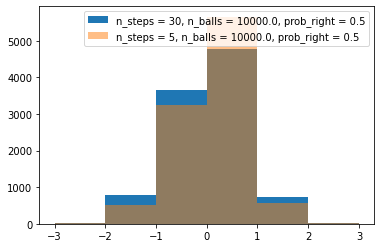

In [148]:
plt.hist(pos_big, bins=bins,label="n_steps = {}, n_balls = {}, prob_right = {}".format(n_steps_big, n_balls_big, g_big.odds_right))
plt.hist(pos_small, bins=bins, label="n_steps = {}, n_balls = {}, prob_right = {}".format(n_steps_small, n_balls_small, g_small.odds_right), alpha=0.5)
plt.legend()
plt.show()

In [258]:
def label_sample_split(alpha, beta, Ntot, samples0_0, samples0_1, samples1_0, samples1_1):
    """
    Calculate the number of samples from each probability for a given alpha, beta, and Ntot in order to have equal numbers of samples from
    each resolution (assuming n_prob1_highres = n_prob1_lowres, n_prob2_highres = n_prob2_lowres)

    Inputs: 
    alpha - label splitting parameter
    beta - sensitive attribute splitting parameter
    Ntot - total number of samples
    samples0_0 - samples from the first probability with sensitive attribute 0
    samples0_1 - samples from the first probability with sensitive attribute 1
    samples1_0 - samples from the second probability with sensitive attribute 0
    samples1_1 - samples from the second probability with sensitive attribute 1

    Returns: total samples
    """
    #! there are all sorts of divide by 0 issues here.
    #todo: add special cases for alpha = 0 and beta = 0 etc.
    
    n0 = Ntot*(1 - alpha - beta) / (2.0*(2*alpha-1)*(beta**2 - beta))
    n1 = n0 * (alpha-beta)/(alpha + beta - 1)

    data_0 = np.concatenate((np.random.choice(samples0_0, round(n0*alpha)), np.random.choice(samples1_0, round(n1*(1-alpha))))) #data with sensitive attribute 0
    data_1 = np.concatenate((np.random.choice(samples0_1, round(n0*(1-alpha))), np.random.choice(samples1_1, round(n1*alpha)))) #data with sensitive attribute 1


    return np.concatenate((np.random.choice(data_0,round(beta*Ntot)), np.random.choice(data_1,round((1-beta)*Ntot))))

<!-- run N dimensional galton board. Independent runs -->
Testing 
Run binary classifier to see if skewed
plot classifier output vs x for relative resolutions

In [259]:
samples0_0 = np.random.uniform(0,1,40)
samples0_1 = np.random.uniform(0,1,4)
samples1_0 = np.random.uniform(-1,0,40)
samples1_1 = np.random.uniform(-1,0,4)

In [260]:
label_sample_split(0.2, 0.4, 10, samples0_0, samples0_1, samples1_0, samples1_1)

array([-0.48005099, -0.04428711, -0.18046086,  0.94196872,  0.52373665,
        0.15977847,  0.58005773,  0.58005773,  0.58005773,  0.52373665])

sensitive: number of steps
label: probablities
4 boards, equally weighted. Fraction of 50/50 high res.

num5050 = num6040
num5050_30 = num5050_5
num6040_30 = num6040_5

datansteps30 = (alpha)num505030 + (1-alpha)num604030
datansteps5 = (1-alpha)num50505 + (alpha)num60405

datatot = (beta)datansteps30 + (1-beta)datansteps5

In [ ]:
beta*(alpha*num_50 + (1-alpha)num_60) = (1-beta)((1-alpha)num_50 + (alpha)num_60)